### Algotimos genéticos

Para los ejemplos utilizaremos el problema del viajante de comercio (TSP)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time

In [2]:
# definición del TSP
N = 100
 
cities = [
	[0.8744058793117488, 0.30207179832703746],
    [0.6901572276474558, 0.8203362566663311],
    [0.7793458478083026, 0.09728979746351918], 
    [0.7483358474304422, 0.4563419482458657], 
    [0.4556164527790729, 0.12863149772605698], 
    [0.1837236688553453, 0.23773749495644914], 
    [0.806151832654163, 0.3288366900529254], 
    [0.6222702185205219, 0.6019431085670109], 
    [0.21886861543988367, 0.6980104036528004], 
    [0.9706096813038716, 0.054871876245520146], 
    [0.13881496219356027, 0.048489530185603646],
    [0.08511086492841424, 0.9123075505436051], 
    [0.45436952164297595, 0.4731540740573398], 
    [0.8986352255038935, 0.5116579750591849], 
    [0.9539248970461742, 0.7530784036308166],
    [0.6321102985156373, 0.13575967095580344],
    [0.31130918313591205, 0.8545457319320597], 
    [0.025897479791937017, 0.7854526665590987],
    [0.31414095045738066, 0.051421702103483846],
    [0.2739561013272712, 0.1970964027924862],
    [0.22762328443470214, 0.627414210742153],
    [0.44920042912037383, 0.18835427573438068],
    [0.2793138301174244, 0.9103956650199608],
    [0.005128451667189338, 0.4655718085045638], 
    [0.9222718335261915, 0.8613103704784812],
    [0.49352498279326595, 0.28652416807644077],
    [0.5560886356057152, 0.034564925228364185],
    [0.0048939219846825255, 0.8635350555457212], 
    [0.7824462381771976, 0.09355415747424733], 
    [0.2973635133076785, 0.037580527218207815],
    [0.659068210692151, 0.5602321147981546], 
    [0.43549418718677035, 0.6241289474799954],
    [0.25580657871099755, 0.519726015381631], 
    [0.5950780852425872, 0.3193476592023645],
    [0.15763623266223903, 0.18210618406479095], 
    [0.3434173147566393, 0.32992255868483356], 
    [0.06451313705472006, 0.12606114349173192], 
    [0.23212286400737547, 0.3945559700824013], 
    [0.955507285594692, 0.02296933408938162],
    [0.7459955912073274, 0.1385374827130177],
    [0.46365765315595475, 0.6132297411379687],
    [0.20196772698059162, 0.046358747430397584], 
    [0.2980093518214506, 0.36041197123227897],
    [0.7533459401199348, 0.6610562232191091], 
    [0.323433933838161, 0.5068337090138902], 
    [0.062138830138457, 0.7177455044259695], 
    [0.47467832142010535, 0.17692718986260936],
    [0.2415634321550142, 0.500852093941769],
    [0.3441878827094532, 0.2604351258948506], 
    [0.5445252142594251, 0.7295590645635646],
    [0.25391391610860914, 0.7641244059389684],
    [0.2630560480211699, 0.010670642241309536],
    [0.2092202940037915, 0.7415775443241935],
    [0.0031474687633804566, 0.6974574785842637],
    [0.4952329615559806, 0.9311775894780175], 
    [0.1978488658972426, 0.8872693649066419],
    [0.1705364411799497, 0.8846808176103278], 
    [0.7634962513234275, 0.4358457309207533], 
    [0.9259752834140167, 0.0056226911773098465],
    [0.22090405091557253, 0.14500040130773872], 
    [0.4636205151855679, 0.19249574424477278], 
    [0.8057632881682811, 0.250168118157608], 
    [0.6785236695642043, 0.39119477830554505],
    [0.4837264739606879, 0.23045417711558214],
    [0.8786721718893166, 0.015853186240832207],
    [0.1263309724872509, 0.9185321014517236], 
    [0.24969404380600335, 0.9600467657522086],
    [0.5886119367943214, 0.10948123668473264], 
    [0.13373527735293878, 0.5336853876899833], 
    [0.5642696742735989, 0.9801384844337597], 
    [0.646401605512568, 0.3338636388089157], 
    [0.05603526365085032, 0.3149530712641142], 
    [0.387141492676661, 0.5792852545912592], 
    [0.8634070619751958, 0.8206820685065667],
    [0.4662474858565825, 0.32647667516764145], 
    [0.01801973379815025, 0.12175434785651695],
    [0.6218125565554127, 0.07860046445444713], 
    [0.6573938922925594, 0.5023092428939168], 
    [0.2837581848186974, 0.02576704782244421], 
    [0.3044774374252185, 0.7310313422019327], 
    [0.33131673439274434, 0.693896434962478], 
    [0.8523694048117944, 0.2805224723356823], 
    [0.6200019812032047, 0.03989814578273998],
    [0.5437394088109648, 0.3258031129949792],
    [0.4386079860370994, 0.6142798815693052],
    [0.7430581106897977, 0.49260737229959284], 
    [0.3913628378102181, 0.3185830750836698], 
    [0.9065498976196814, 0.02381958527497441], 
    [0.6874236611131453, 0.18642068590773597], 
    [0.6946411585627993, 0.36991609629423117], 
    [0.3784063098306413, 0.01018756575849844], 
    [0.43806374889930155, 0.2268325586117821], 
    [0.7411632641820634, 0.35513151640087337], 
    [0.3884706603234591, 0.34043302784114093], 
    [0.08674110453583683, 0.4491174987265194], 
    [0.9794883193315694, 0.11207520940235804], 
    [0.7496156619797683, 0.23845386610980834], 
    [0.4423888847621813, 0.17212722421686055], 
    [0.2276570035864689, 0.6515924491551327],
    [0.836939257954547, 0.0499933914625984]
] # Length=8.587

def dist(x, y): # distancia euclídea
	return ((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5

def globaldist(cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def fit_cities(cities): # fitness para TSP
	return 1 / (1+globaldist(cities))

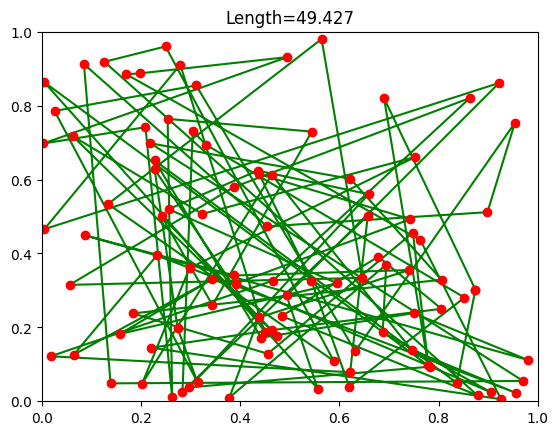

In [3]:
# draw a TSP solution
def draw(solution):
    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    xlim = axes.set_xlim(0.0,1.0)
    ylim = axes.set_ylim(0.0,1.0)
    x = []
    y = []

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera

    c = np.array(bucle)
    x = c[:,0]
    y = c[:,1]

    l1, = axes.plot(x, y,'g')
    l2, = axes.plot(x, y,'ro')
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)

draw(cities)

Haremos una implementación funcional, aunque sería más apropiado definir una clase

In [ ]:
def create(alphabet: list, N=100) -> list[list]:
    """Create and return new population"""

    population = []
    for i in range(N):
        population.append(copy.copy(alphabet))
        random.shuffle(population[i])
    return population

def sort_pop(population: list[list], fitness_function, reversed: bool) -> tuple[list[list], list]:
    """Sort population by fitness function. Return tuple with population list and fitness list"""

    fitness_list = [fitness_function(ind) for ind in population]
    lista = sorted(zip(population, fitness_list), key=lambda x: x[1], reverse=reversed)
    sorted_pop = [x[0] for x in lista]
    sorted_fitness = [x[1] for x in lista]
    return sorted_pop, sorted_fitness

def select(population: list[list], T: int) -> list:
    """Return a copy of an indivudual by tournament selection. Population already ordered by fitness"""

    choices=random.choices(copy.copy(population),k=T)
    indices=[population.index(c) for c in choices]
    return population[np.argmin(indices)]

def crossover(parent1: list, parent2: list, pcross: float) -> tuple[list, list]:
    """Performs crossover on two parents to generate two children."""
    
    child1, child2 = [], []
    for i in range(len(parent1)):
        if random.random()<pcross:
            if parent1[i] not in child1:
                child1.append(parent1[i])
            else:
                child1.append(parent2[i])
            if parent2[i] not in child2:
                child2.append(parent2[i])
            else:
                child2.append(parent1[i])
        else:
            if parent2[i] not in child1:
                child1.append(parent2[i])
            else:
                child1.append(parent1[i])
            if parent1[i] not in child2:
                child2.append(parent1[i])
            else:
                child2.append(parent2[i])
    return child1,child2

def mutate(individual: list, pmut: float) -> list:
    """Mutate an individual, swap elements. Return mutated individual"""

    if random.random() < pmut:
        index1, index2 = random.choices(range(len(individual)), k=2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

def checkvalid(ind):
    tuple_subarrays = [tuple(subarray) for subarray in ind]
    # Compare the length of the set with the original array
    return len(tuple_subarrays) == len(set(tuple_subarrays))

def evolve(population: list[list], fitness_function, pmut: float, minimize: bool, pcross=0.7, ngen=100, T=2, trace=0, elitism=False) -> None:
    for i in range(ngen):
        new_pop = []
        sorted_pop,_ = sort_pop(population,fitness_function,minimize)
        if elitism:
            new_pop.append(sorted_pop[0])
            new_pop.append(sorted_pop[1])
        while len(new_pop) != 100:   
            individual1 = select(sorted_pop,T)
            individual2 = select(sorted_pop,T)
            child1,child2 = crossover(individual1,individual2,pcross)
            if checkvalid(child1) and checkvalid(child2):
                mutated1 = mutate(child1,pmut)
                mutated2 = mutate(child2,pmut)
                new_pop.append(mutated1)
                new_pop.append(mutated2)
            else:
                pass
        if i % trace == 0 or i == ngen-1:
            sorted_pop, sorted_fitness = sort_pop(sorted_pop, fitness_function, minimize)
            print(f"Num gen: {i}, Fitness óptimo: {sorted_fitness[0]}")
        population = [*new_pop] # make a copy
    sorted_pop,_ = sort_pop(population,fitness_function,minimize)
    return sorted_pop

----

In [5]:
# Prueba simple 
alphabet = list(range(10))

pop = create(alphabet)
print("create: ", pop[:2])

def fit(ind):
    # cuenta los mal colocados
    distance = 0
    for i in range(len(ind)):
        distance += abs(i-ind[i])
    return distance # mejor cuanto más colocados

pop, fitness = sort_pop(pop, fit)
print(f"sort_pop: {len(pop)} individuos, {len(pop[0])} genes/individuo", )
print(f"Primer individuo: {pop[0]}")
print(f"Primer fitness: {fitness[0]}")

for _ in range(3):
    ind = select(pop, 5)
    print(f"Selected: {ind}")

i2 = mutate(pop[0], 0.9)
print(f"Mutate: {i2}")

i1 = list(range(10))
i2 = list(reversed(i1))
print(f"No crossover:\t{i1,i2}")
i1, i2 = crossover(i1, i2, 1.0)
print(f"Crossover:\t{i1,i2}")


create:  [[2, 8, 4, 1, 6, 5, 9, 0, 7, 3], [1, 5, 0, 2, 3, 6, 9, 7, 4, 8]]
sort_pop: 100 individuos, 10 genes/individuo
Primer individuo: [1, 2, 0, 4, 5, 6, 3, 7, 9, 8]
Primer fitness: 12
Selected: [1, 2, 0, 4, 5, 6, 3, 7, 9, 8]
Selected: [0, 3, 2, 7, 5, 1, 6, 9, 8, 4]
Selected: [1, 5, 0, 2, 3, 6, 9, 7, 4, 8]
Mutate: [1, 2, 0, 3, 5, 6, 4, 7, 9, 8]
No crossover:	([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
Crossover:	([0, 1, 2, 3, 9, 8, 7, 6, 5, 4], [9, 8, 7, 6, 0, 1, 2, 3, 4, 5])


In [11]:
pop = create(alphabet)
final_pop = evolve(pop, fit, 0.1, pcross=0.7, ngen=1000, T=8, trace=200)
print(f"Best individual final generation:\n", final_pop[0], fit(final_pop[0]))

Num gen: 0, Fitness óptimo: 16
Num gen: 200, Fitness óptimo: 4
Num gen: 400, Fitness óptimo: 4
Num gen: 600, Fitness óptimo: 4
Num gen: 800, Fitness óptimo: 2
Best individual final generation:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 0


----

## Vamos con el TSP

### Evolucionamos y pintamos resultados

Num gen: 0, Fitness óptimo: 45.16490700522701
Num gen: 100, Fitness óptimo: 28.278860100855148
Num gen: 200, Fitness óptimo: 25.443100799295443
Num gen: 300, Fitness óptimo: 23.902105869329013
Num gen: 400, Fitness óptimo: 20.7907800795509
Num gen: 500, Fitness óptimo: 19.96177946388616
Num gen: 600, Fitness óptimo: 19.530758815849644
Num gen: 700, Fitness óptimo: 19.15307083938542
Num gen: 800, Fitness óptimo: 18.482084175171163
Num gen: 900, Fitness óptimo: 18.188372522685246
Num gen: 999, Fitness óptimo: 17.789306892040766


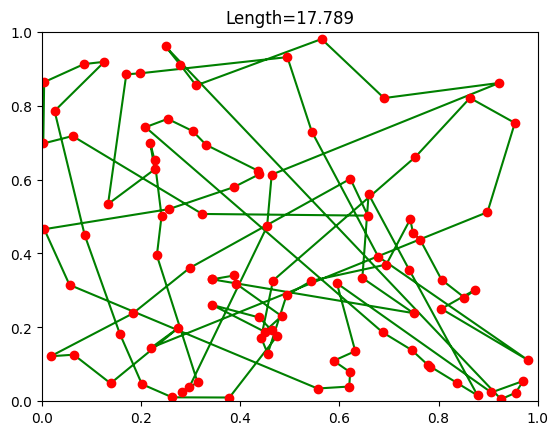

In [10]:
pop = create(cities)
pop = evolve(pop, globaldist, pmut=0.05, ngen=1000, trace=100, minimize=False)
draw(pop[0])

No llega a una solución suficientemente buena. Puede ser por varios motivos:
  * Pocas generaciones. Continuar a ver.
  * pmut incorrecta: demasiado baja: convergencia muy lenta; demasiado alta: mucha aleatoriedad, la optimización no progresa debido al ruido.
  * T incorrecto: demasiado bajo, pocas opciones a los mejores; demasiado alto: se cae en minimo local.
  * El mejor individuo se pierde: probar elitismo.
  * Hemos caído en un mínimo local: volver a empezar (multiarranque).

Num gen: 0, Fitness óptimo: 45.529579523126664
Num gen: 500, Fitness óptimo: 17.33812456926952
Num gen: 1000, Fitness óptimo: 14.527641903074818
Num gen: 1500, Fitness óptimo: 13.751608680237151
Num gen: 2000, Fitness óptimo: 13.299964009585624
Num gen: 2500, Fitness óptimo: 12.957143670986643
Num gen: 3000, Fitness óptimo: 12.658010024995928
Num gen: 3500, Fitness óptimo: 12.567094625367728
Num gen: 4000, Fitness óptimo: 12.37552467604357
Num gen: 4500, Fitness óptimo: 12.108613166290052
Num gen: 5000, Fitness óptimo: 12.07160637632187
Num gen: 5500, Fitness óptimo: 12.07160637632187
Num gen: 6000, Fitness óptimo: 12.07160637632187
Num gen: 6500, Fitness óptimo: 12.07160637632187
Num gen: 7000, Fitness óptimo: 12.07160637632187
Num gen: 7500, Fitness óptimo: 12.07160637632187
Num gen: 8000, Fitness óptimo: 12.07160637632187
Num gen: 8500, Fitness óptimo: 12.07160637632187
Num gen: 9000, Fitness óptimo: 12.07160637632187
Num gen: 9500, Fitness óptimo: 12.07160637632187
Num gen: 9999, F

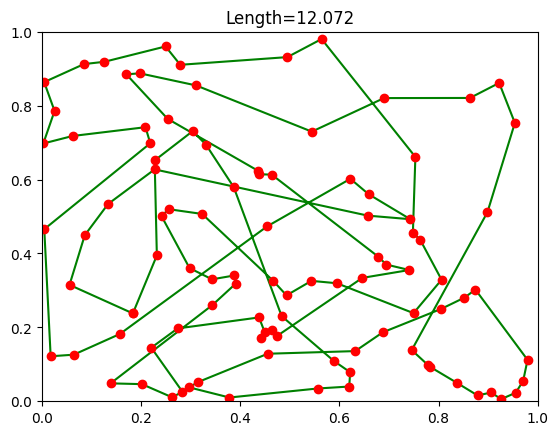

In [11]:
# aumentamos generaciones
pop = create(cities)
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, minimize=False)
draw(pop[0])

In [ ]:
# la optimización se estanca, quizá es que T es demasiado bajo
pop = create(cities)
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, T=6, minimize=False)
draw(pop[0])

In [ ]:
# hay otras estrategias de mutación mejores para este problema, por ejemplo borrar e insertar
# la mutación consistirá en borrar un elemento e insertarlo en otro lado
def mutate(individual: list[list], pmut: float) -> list[list]: 
    if random.random() < pmut:
        index_pop, index_insert = random.choices(range(len(individual)), k=2)
        value = individual.pop(index_pop)
        individual.insert(index_insert, value)
    
    return individual

In [ ]:
pop = create(cities)
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, T=6, minimize=False)
draw(pop[0])

In [ ]:
# continuamos, pero parece estancarse
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, T=6, minimize=False)
draw(pop[0])

In [ ]:
# pero el azar siempre es nuestro aliado
# el uso de varios operadores de mutación ayuda a salir de mínimos locales

# la mutación consistirá en intercambiar elementos
def mutate_swap(individual: list[list], pmut: float) -> list[list]:
    if random.random() < pmut:
        index1, index2 = random.choices(range(len(individual)), k=2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

# la mutación consistirá en borrar un elemento e insertarlo en otro lado
def mutate_insert(individual: list[list], pmut: float) -> list[list]:
    if random.random() < pmut:
        index_pop, index_insert = random.choices(range(len(individual)), k=2)
        value = individual.pop(index_pop)
        individual.insert(index_insert, value)
    return individual

# selecciona dos puntos e invierte la secuencia entre ellos
def mutate_reverse(individual: list[list], pmut: float) -> list[list]: 
    if random.random() < pmut:
        index1, index2 = sorted(random.sample(range(len(individual)), 2))
        individual[index1:index2 + 1] = individual[index1:index2 + 1][::-1]
    return individual

mutations = [mutate_swap, mutate_insert, mutate_reverse]
def mutate(ind, pmut):
    operator = random.choice(mutations)
    return operator(ind, pmut)

In [ ]:
pop = create(cities)
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, T=6, minimize=False)
draw(pop[0])

In [ ]:
# parece que ahora vamos por buen camino; continuamos un poco más
pop = evolve(pop, globaldist, pmut=0.05, ngen=10000, trace=500, T=6, minimize=False)
draw(pop[0])

## **Optimización de números reales**

In [ ]:
# Define operadores de números reales

rang = (-5, 5) # al no hacerlo con clases, debemos definir el rango como variable global

def create(N=100):
    pop=[[random.random()*10-5,random.random()*10-5] for _ in range(N)]
    return pop

def crossover(parent1: list[float, float], parent2: list[float, float], pcross: float) -> tuple[list[float, float]]: 
    child1, child2 = parent1[:], parent2[:]
    if random.random()<pcross:
        child1 = [parent1[0], parent2[1]]
        child2 = [parent1[1], parent2[0]]
    return child1, child2

def mutate(individual: list[float, float], pmut: float) -> list[float, float]:
    if random.random()<pmut:
        individual[0], individual[1] = random.random()*10-5, random.random()*10-5
    return individual

def evolve(population: list[list], fitness_function, pmut: float, minimize: bool, pcross=0.7, ngen=100, T=2, trace=0, elitism=False) -> None:
    for i in range(ngen):
        new_pop = []
        sorted_pop,_ = sort_pop(population,fitness_function,minimize)
        if elitism:
            new_pop.append(sorted_pop[0])
            new_pop.append(sorted_pop[1])
        while len(new_pop) != 100:   
            individual1 = select(sorted_pop,T)
            individual2 = select(sorted_pop,T)
            child1,child2 = crossover(individual1,individual2,pcross)
            mutated1 = mutate(child1,pmut)
            mutated2 = mutate(child2,pmut)
            new_pop.append(mutated1)
            new_pop.append(mutated2)
        if i % trace == 0 or i == ngen-1:
            sorted_pop, sorted_fitness = sort_pop(sorted_pop, fitness_function, minimize)
            print(f"Num gen: {i}, Fitness óptimo: {sorted_fitness[0]}")
        population = [*new_pop] # make a copy
    sorted_pop,_ = sort_pop(population,fitness_function,minimize)
    return sorted_pop

In [ ]:
# himmelblau modified to have only one global minimum (-3.77, -3.28)
# si se pone "onlyone" a True 
onlyone = True
def himmelblau(chromosome: list[float, float]) -> float:
	x = chromosome[0]
	y = chromosome[1]
	fxy = (x**2 + y - 11)**2 + (x + y**2 -7)**2
	if onlyone and (x>0 or y>0): 
		fxy += 0.5
	return fxy

# fitness para himmelblau: valor mínimo de la función
def fitness_himmel(chromosome: list[float, float]):
	return 1 / (1 + himmelblau(chromosome))

In [10]:
pop = create(N=100)
pop = evolve(pop, fitness_himmel, pmut=0.05, ngen=1000, trace=100, T=6, minimize=True)
print(pop[0])

Num gen: 0, Fitness óptimo: 0.3227242415784348
Num gen: 100, Fitness óptimo: 0.47095745467815137
Num gen: 200, Fitness óptimo: 0.7007024116029027
Num gen: 300, Fitness óptimo: 0.7007024116029027
Num gen: 400, Fitness óptimo: 0.7007024116029027
Num gen: 500, Fitness óptimo: 0.7007024116029027
Num gen: 600, Fitness óptimo: 0.7007024116029027
Num gen: 700, Fitness óptimo: 0.7007024116029027
Num gen: 800, Fitness óptimo: 0.8669664365547662
Num gen: 900, Fitness óptimo: 0.8669664365547662
Num gen: 999, Fitness óptimo: 0.9943087312986183
[-3.782411649134322, -3.273300552009366]


## **Otras sugerencias opcionales**
  * *Ampliar el TSP a 3 dimensiones*, incluyendo el dibujo con matplotlib.
  * *Cuadrado mágico de 8x8*: deben sumar lo mismo filas, columnas y diagonales principales.
  * *n-reinas*: colocar n reinas en un tablero de modo que ninguna se coma a otra.
  * *mochila*: llenar una mochila con objetos de una tabla de modo que se maximice la supervivencia y no se exceda la capacidad.
  * *Probar con otras funciones numéricas con convexas* (ver la celda siguiente).

Ejemplo de cuadrado mágico de 8x8:

[[63 54 14 44 13 57  7  8]  
 [20  2 45  9 17 64 51 52]  
 [38 47 21 62 27 29  4 32]  
 [18 36 33 40 28 23 34 48]  
 [39  3 50  5 42 24 56 41]  
 [12 26 43 30 53 16 22 58]  
 [11 37 35 60 49  1 61  6]  
 [59 55 19 10 31 46 25 15]]  

In [ ]:
# otras funciones

import math
def ackley (ch): # min in (0,0); huge set of local minima
	x = ch[0]
	y = ch[1]
	fxy = -20 * math.exp( -0.2 * (0.5 * (x**2 + y**2)) ** 0.5 ) \
		- math.exp (0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.e + 20
	return fxy

def beale (ch):
	x = ch[0]
	y = ch[1]
	term1 = (1.5 - x + x * y) ** 2
	term2 = (2.25 - x + x * y ** 2) ** 2
	term3 = (2.625 - x + x * y ** 3) ** 2
	return term1 + term2 + term3

def easom (ch):
	x = ch[0]
	y = ch[1]
	return -math.cos(x) * math.cos(y) * math.exp(-(x - math.pi)**2 - (y - math.pi)**2)

def goldstein_price_function(ch):
	x = ch[0]
	y = ch[1]
	term1 = (1 + (x + y + 1) ** 2 * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2))
	term2 = (30 + (2 * x - 3 * y) ** 2 * (18 - 32 * x + 12 * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))
	return term1 * term2

def rosenbrock (ch):
	x = ch[0]
	y = ch[1]
	a = 1
	b = 100
	term1 = (a - x) ** 2
	term2 = b * (y - x ** 2) ** 2
	return term1 + term2

def rosenbrock_ndim (x):
    a = 1
    b = 100
    sum = 0
    for i in range(len(x)-1):
        sum += (a - x[i])**2 + b * (x[i+1] - x[i]**2)**2
    return sum


### Otros ejemplos

  * Canal del profesor en https://www.youtube.com/@franciscoserradilla5932
  * Viajante de comercio en 3D: https://youtu.be/M-Wvq6LS_Ko?si=a9AkrZ0ipgoYr8x6
  * Lunar lander con Neuroevolución: https://youtu.be/nIS9yeiqDEA?si=uvUJr_aY4KUyKdqx
  